In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import math
from scipy.optimize import curve_fit
import pandas as pd
from global_land_mask import globe
import xarray as xr
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [5]:
g = '/media/rakshith/Seagate Expansion Drive/mraks/land sea ERA.nc'
#g = '/media/rakshith/Windows/Users/mraks/land sea ERA.nc'
f7 = netCDF4.Dataset(g)
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
#h = '/media/rakshith/Windows/Users/mraks/TGMS ERA 1959-2021, India only.nc'
f8 = netCDF4.Dataset(h)
v1 = f7['lsm'][0, :, :]
m = '/media/rakshith/Seagate Expansion Drive/mraks/ERA relative humidity.nc'
f9 = xr.open_dataset(m)

In [5]:
#Rainfall vs Pwat
X = np.linspace(1959, 2021, 63, dtype='int')
Months = ['June', 'July', 'August', 'September']

PE = []
Qdiv1 = []
E1 = []
P1 = []
Pwat1 = []
year = [1959, 2012]
end = [1968, 2021]

for i in range(len(year)):
    a = (year[i] - 1959)*12
    b = (end[i]-1959+1)*12
    for j in range(a, b, 12):
        for k in range(j, j+12):
        #for k in range(j+5, j+9):
            sum1 = 0
            sum2 = 0
            sum3 = 0
            sum4 = 0
            sum5 = 0
            v2 = f8['mtnswrf'][k, :, :]
            v3 = f8['mtnlwrf'][k, :, :]
            v4 = f8['mslhf'][k, :, :]
            v5 = f8['msshf'][k, :, :]
            v6 = f8['msnswrf'][k, :, :]
            v7 = f8['msnlwrf'][k, :, :]            
            v8 = f8['mtpr'][k, :, :]
            v9 = f8['mer'][k, :, :]
            v10 = f8['tcwv'][k, :, :]
            sum1 = 86400*(-v9)
            sum2 = 86400*(v8)
            sum3 = v10
            sum4 = sum4 + v2+v3+v4+v5+v6+v7
            sum5 = sum5 + 86400*(v8+v9)
            x = np.multiply(v1, sum1)
            y = np.multiply(v1, sum2)
            z = np.multiply(v1, sum3)
            m = np.multiply(v1, sum4)
            n = np.multiply(v1, sum5)
            E1.append(np.average(x[np.nonzero(x)]))
            P1.append(np.average(y[np.nonzero(y)]))
            Pwat1.append(np.average(z[np.nonzero(z)]))
            Qdiv1.append(np.average(m[np.nonzero(m)]))
            PE.append(np.average(n[np.nonzero(n)]))

#Curve fitting
div = int((len(Pwat1))/2)
print(div)
x1, y1 = Pwat1[:div], P1[:div]
x2, y2 = Pwat1[div:], P1[div:]

120


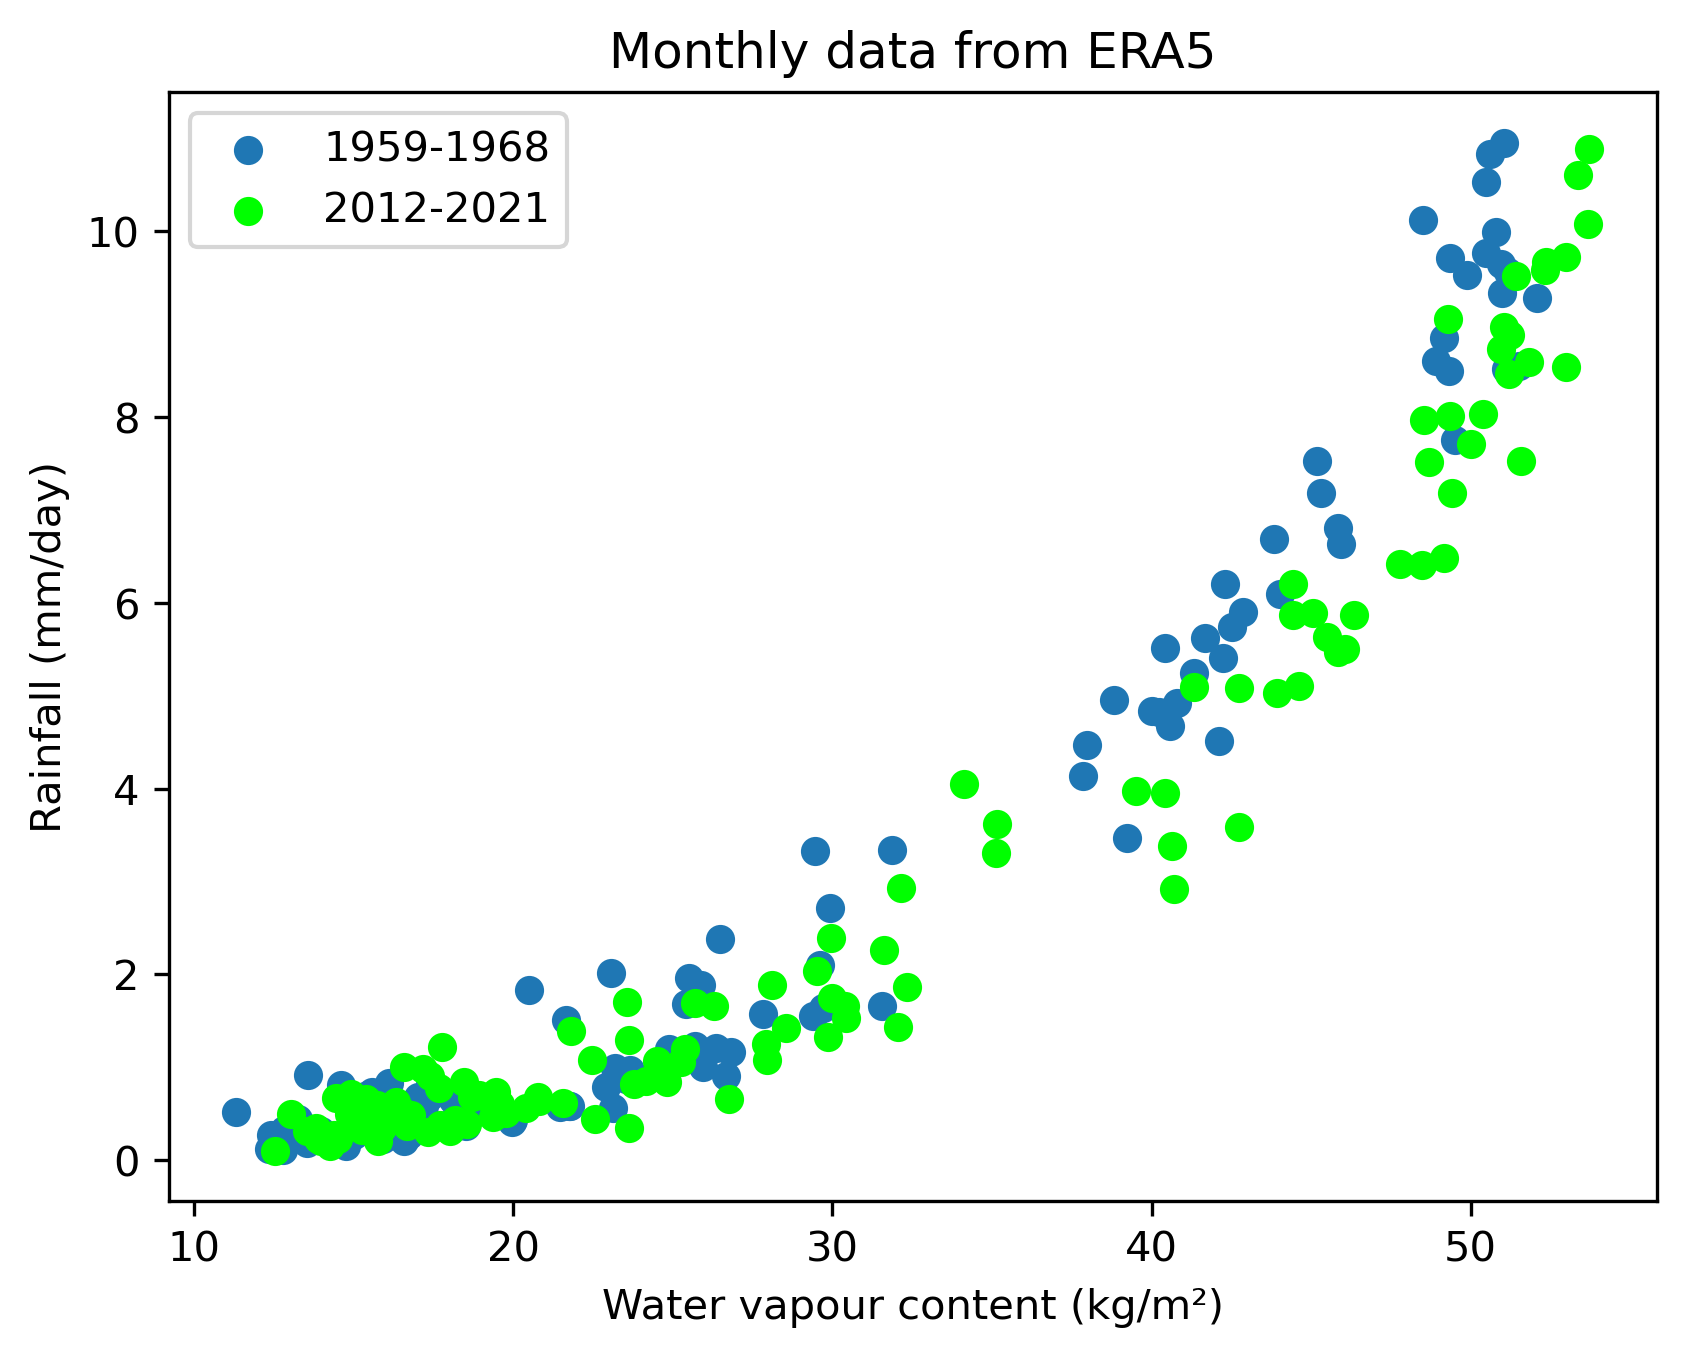

In [6]:
plt.scatter(x1, y1, label='1959-1968')
plt.scatter(x2, y2, c='lime', label='2012-2021')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('Monthly data from ERA5')
#plt.title('Only months June-September')
plt.legend()
plt.show()

In [7]:
#Relative humidity fitting
rh = f9.r.where(v1>0).mean(dim=['latitude', 'longitude', 'level'])

In [38]:
r1 = rh.sel(time=slice('1959','1968')).values/100
r2 = rh.sel(time=slice('2012','2021')).values/100

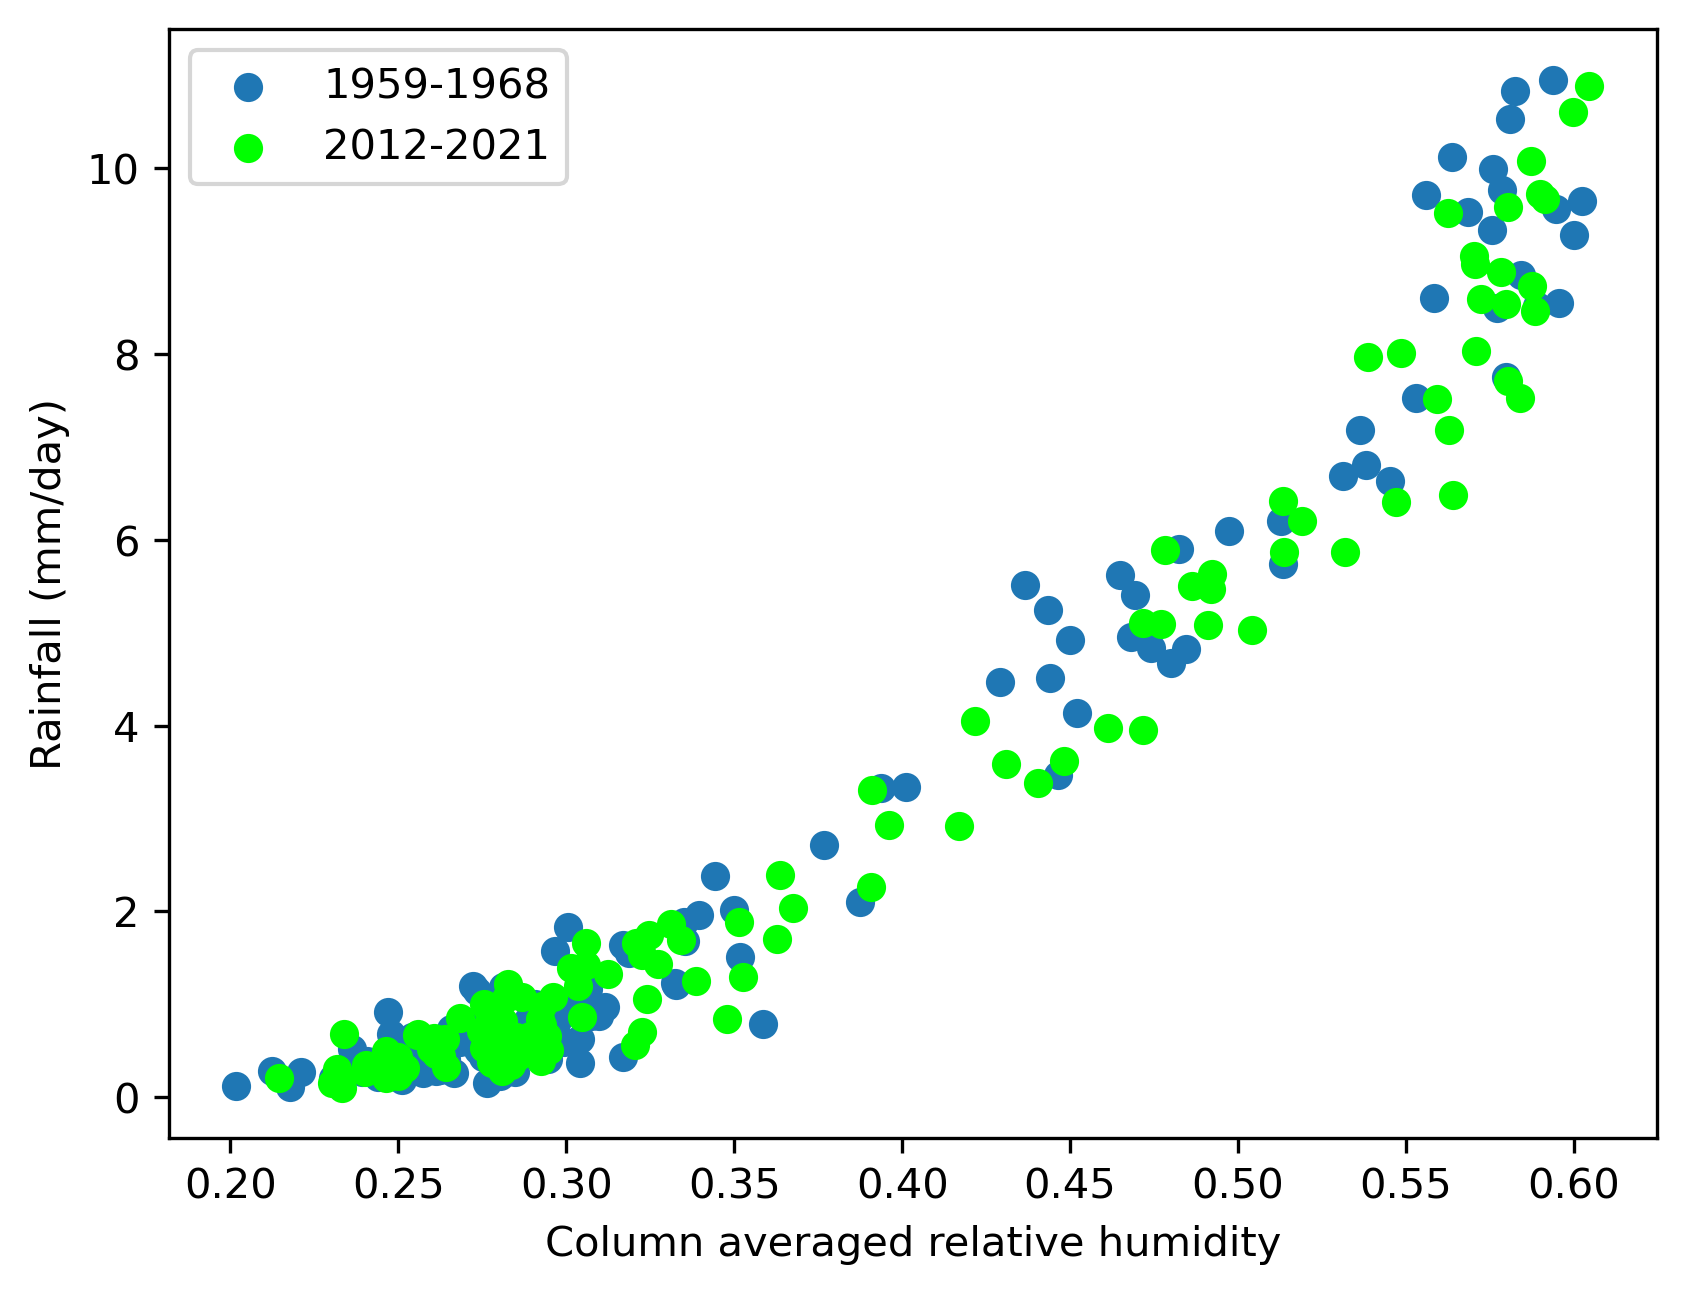

In [39]:
plt.scatter(r1, y1, label='1959-1968')
plt.scatter(r2, y2, c='lime', label='2012-2021')
plt.xlabel('Column averaged relative humidity')
plt.ylabel('Rainfall (mm/day)')
plt.legend()
plt.show()

In [40]:
from scipy.stats import binned_statistic
b = np.arange(0,1,0.01)
bin_means1, bin_edges1, binnumber1 = binned_statistic(r1, y1, statistic='mean', bins=b)
bin_means2, bin_edges2, binnumber2 = binned_statistic(r2, y2, statistic='mean', bins=b)

X = (bin_edges1[0:-1]+bin_edges1[1:])*0.5 #x axis

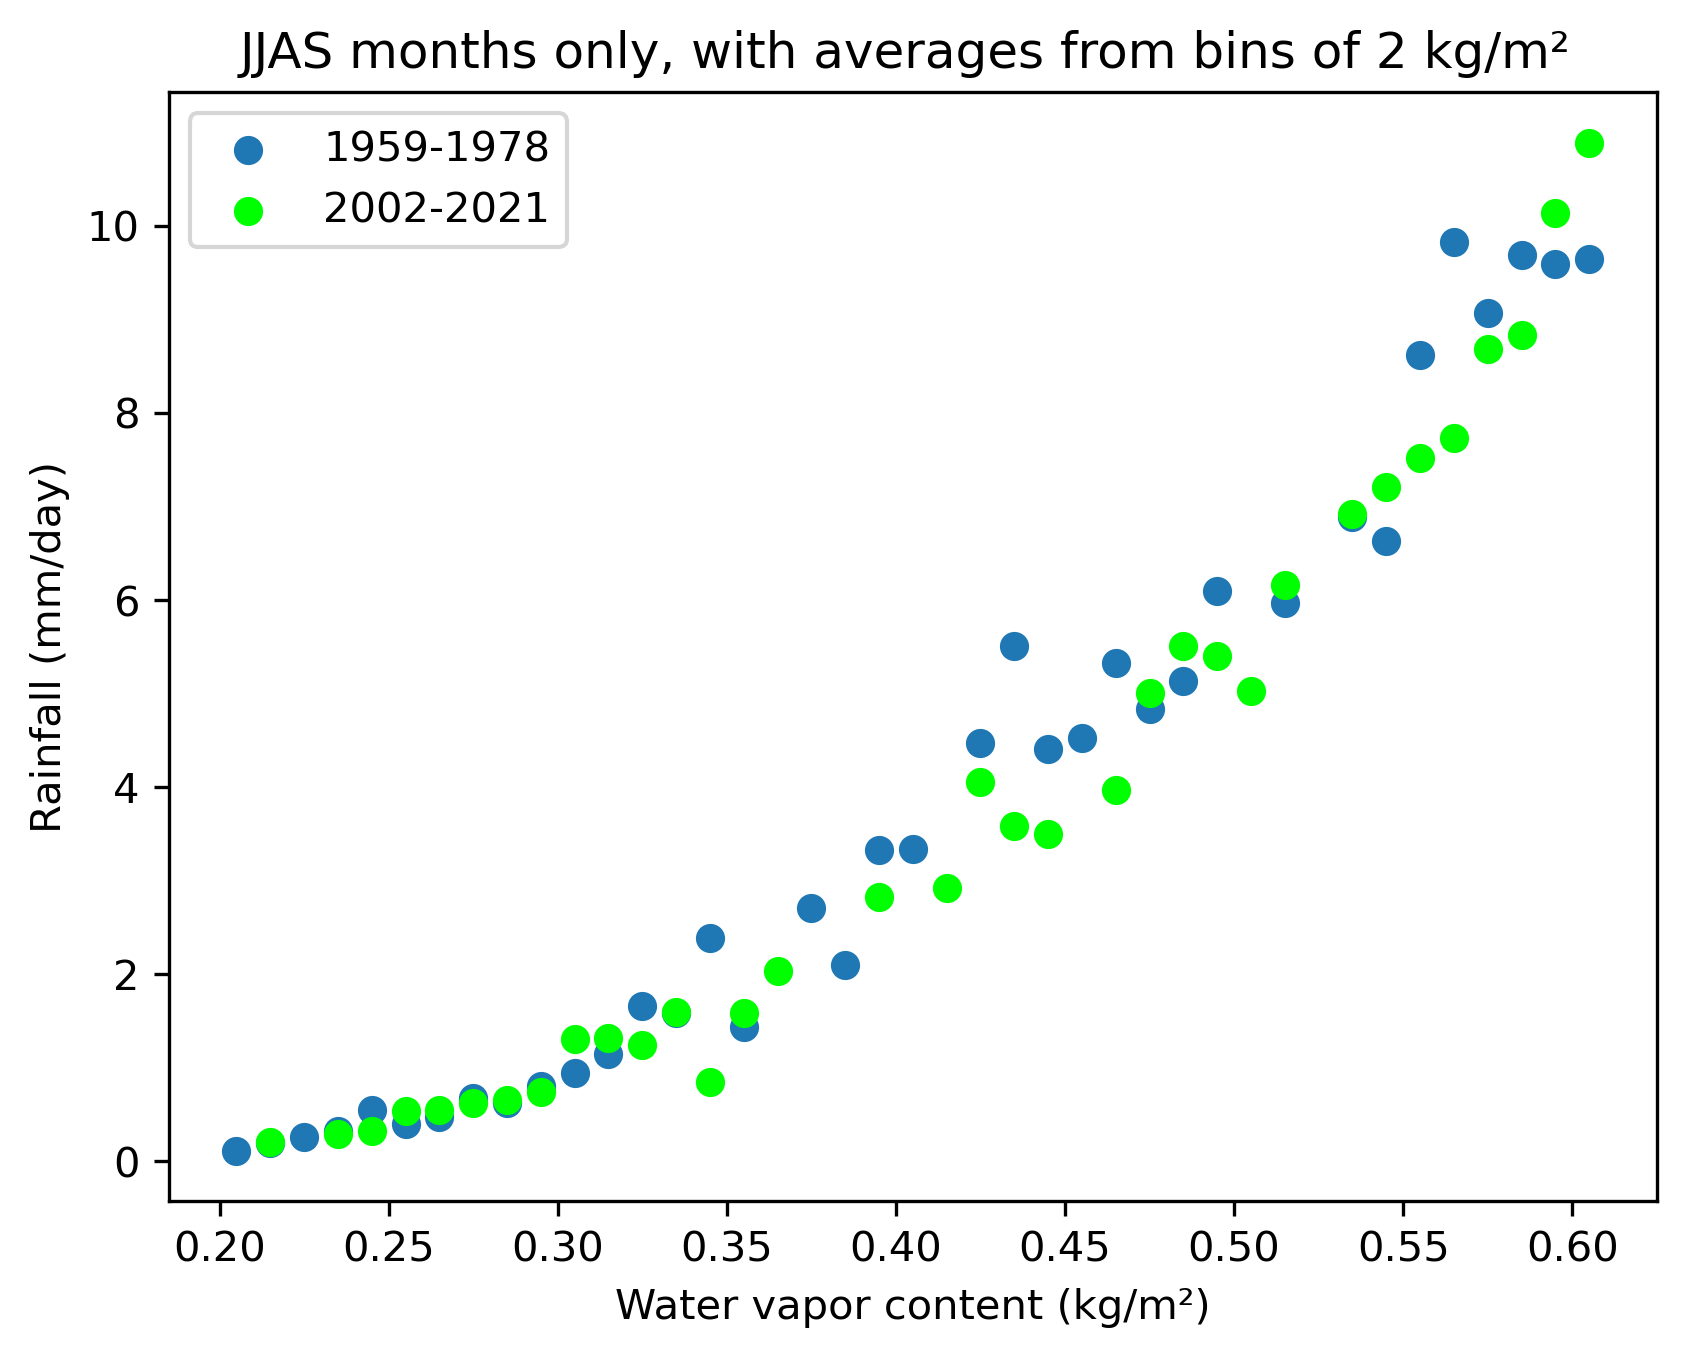

In [41]:
plt.scatter(X, bin_means1)
plt.scatter(X, bin_means2, c='lime')
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('JJAS months only, with averages from bins of 2 kg/m\u00b2 ')
plt.legend(['1959-1978', '2002-2021'])

In [47]:
def func(r, ad, rd):
    return np.e**(ad*(r-rd))

In [52]:
popt1, _ = curve_fit(func, r1, y1)
popt2, _ = curve_fit(func, r2, y2)
ad1, rd1 = popt1
ad2, rd2 = popt2

/tmp/ipykernel_4887/3922479084.py:2: RuntimeWarning: overflow encountered in power
  return np.e**(ad*(r-rd))


In [56]:
x_line1 = np.linspace(np.min(r1), np.max(r1), 100)
y_line1 = func(x_line1, ad1, rd1)
x_line2 = np.linspace(np.min(r2), np.max(r2), 100)
y_line2 = func(x_line2, ad2, rd2)

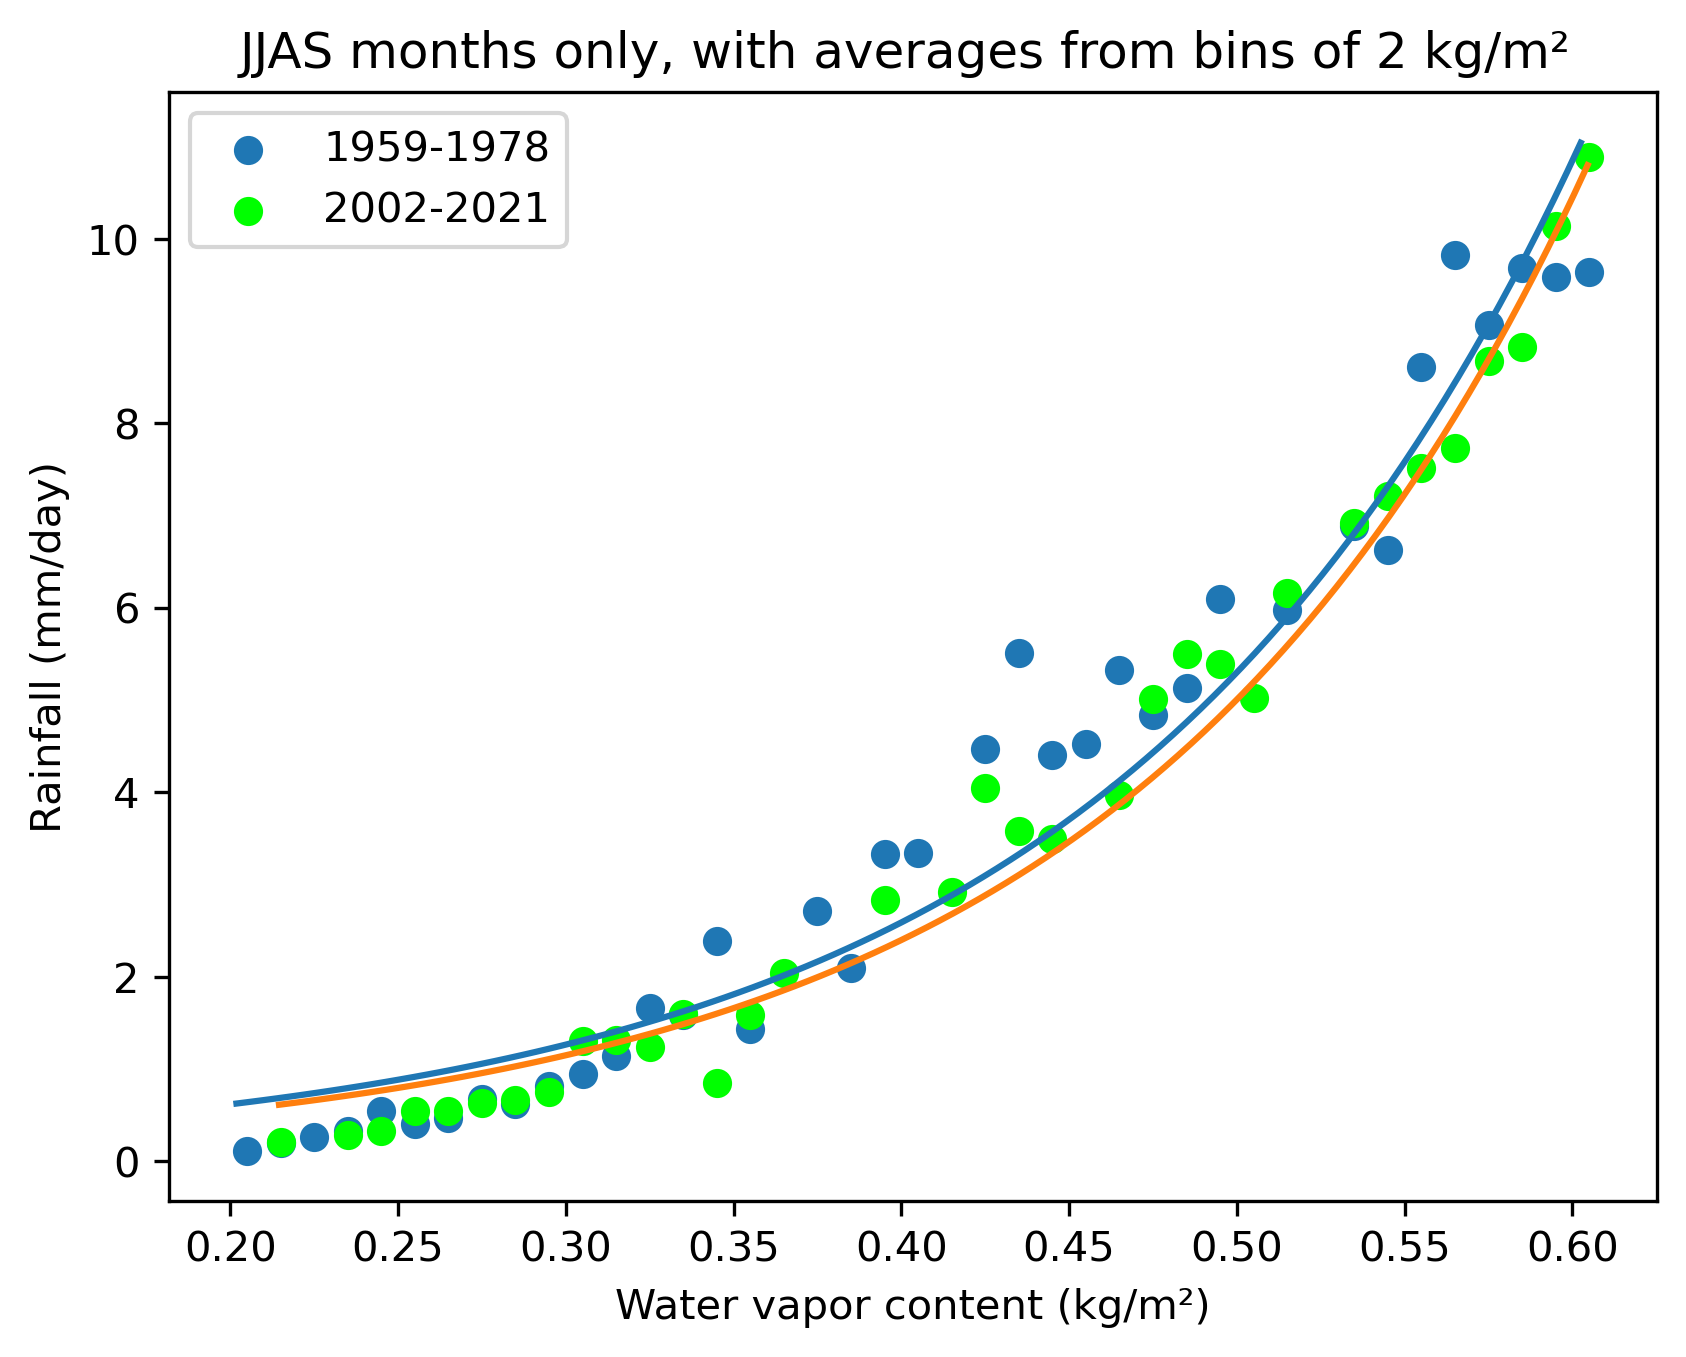

In [57]:
plt.scatter(X, bin_means1)
plt.scatter(X, bin_means2, c='lime')
plt.plot(x_line1, y_line1)
plt.plot(x_line2, y_line2)
plt.xlabel('Water vapor content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('JJAS months only, with averages from bins of 2 kg/m\u00b2 ')
plt.legend(['1959-1978', '2002-2021'])

In [6]:
#IMD
path = '/media/rakshith/Seagate Expansion Drive/IMD/'
fi = '/RFone_imd_rf_1x1_*.nc'
imd=xr.open_mfdataset(path+fi)

In [7]:
imd1=imd.sel(LATITUDE=slice(10,30), LONGITUDE=slice(70,90)).resample(TIME='M').mean(dim='TIME')

In [8]:
lon_grid, lat_grid = np.meshgrid(imd1.LONGITUDE, imd1.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

In [9]:
Pimd1 = imd1.sel(TIME=slice('1959', '1968')).where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE'])
Pimd2 = imd1.sel(TIME=slice('2012', '2021')).where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE'])

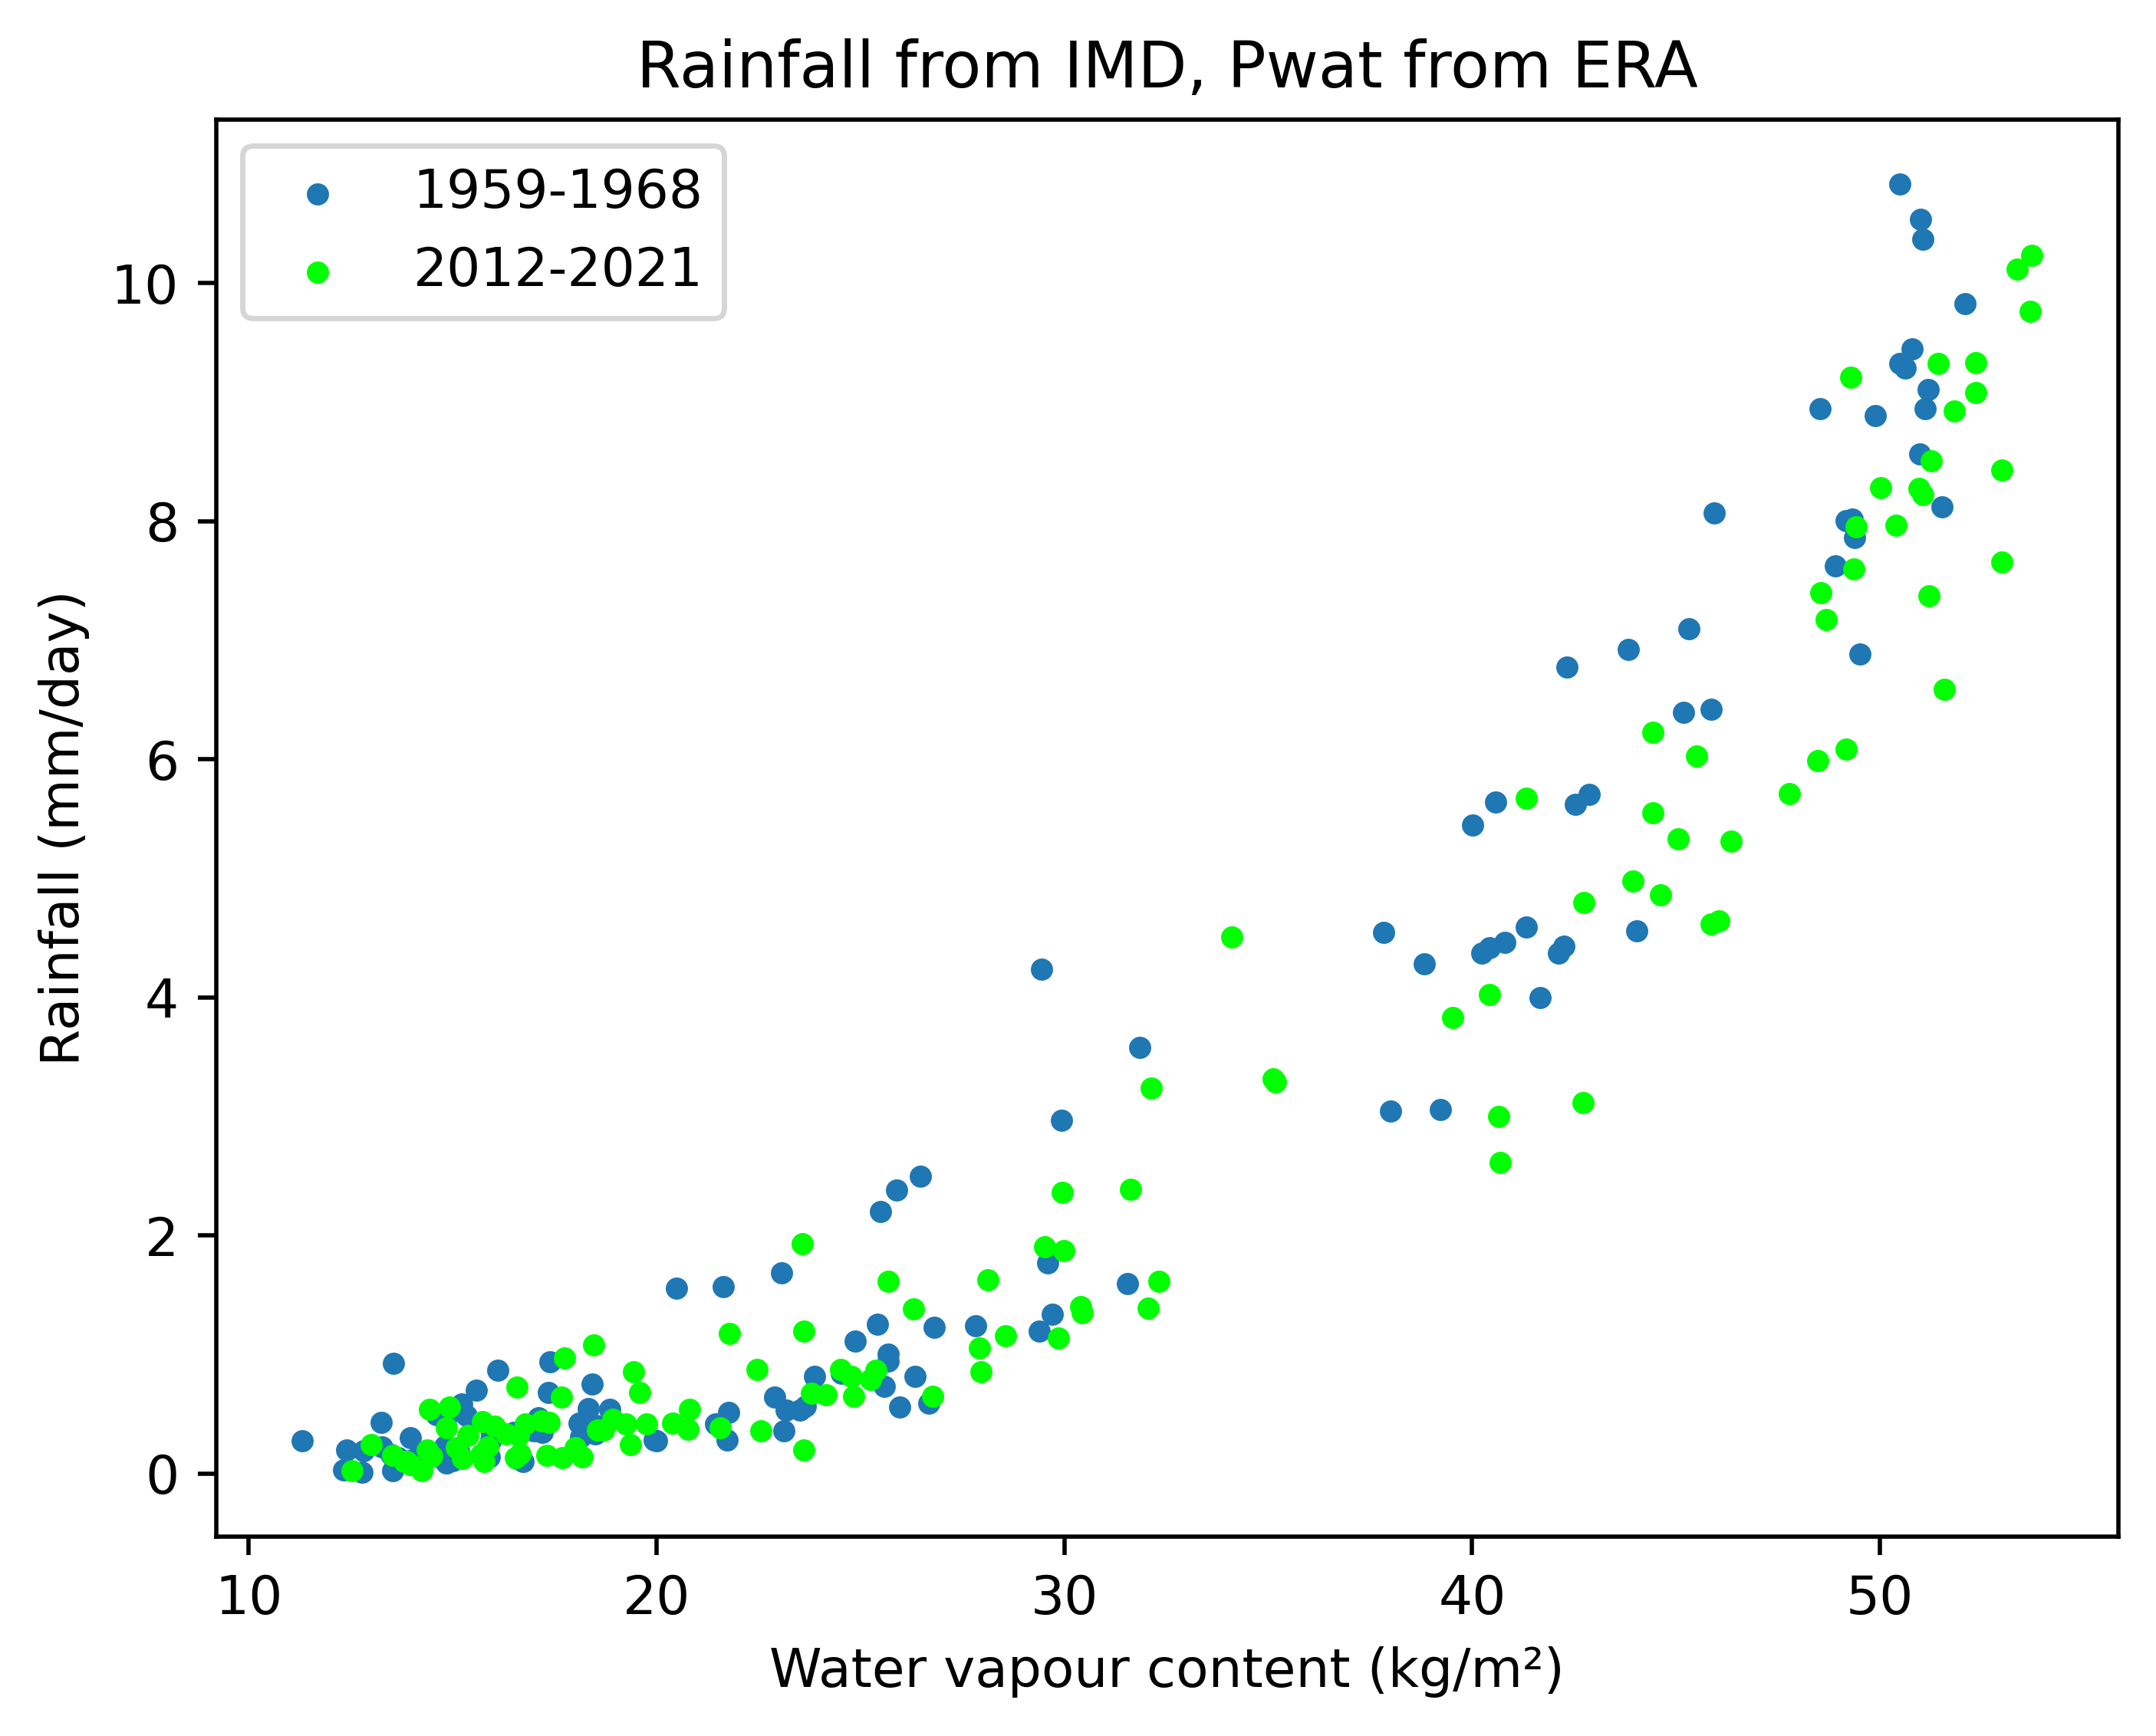

In [11]:
plt.scatter(x1, Pimd1.RAINFALL, s=10, label='1959-1968')
plt.scatter(x2, Pimd2.RAINFALL, c='lime', s=10, label='2012-2021')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
plt.title('Rainfall from IMD, Pwat from ERA')
#plt.title('Only months June-September')
plt.legend()
plt.show()

In [6]:
#BOB
lats = f8['latitude'][:] 
lons = f8['longitude'][:]
lat_bnds, lon_bnds = [10, 20], [85, 95]

lat_inds = np.where((lats >= lat_bnds[0]) & (lats <= lat_bnds[1]))
lon_inds = np.where((lons >= lon_bnds[0]) & (lons <= lon_bnds[1]))

v1 = 1
E1 = []
P1 = []
Pwat1 = []
year = [1959, 2012]
end = [1968, 2021]

for i in range(len(year)):
    a = (year[i] - 1959)*12
    b = (end[i]-1959+1)*12
    for j in range(a, b, 12):
        for k in range(j, j+12):
        #for k in range(j+5, j+9):
            sum1 = 0
            sum2 = 0
            sum3 = 0
            v8 = f8['mtpr'][k, lat_inds[0], lon_inds[0]]
            v9 = f8['mer'][k, lat_inds[0], lon_inds[0]]
            v10 = f8['tcwv'][k, lat_inds[0], lon_inds[0]]
            sum1 = 86400*(-v9)
            sum2 = 86400*(v8)
            sum3 = v10
            x = np.multiply(v1, sum1)
            y = np.multiply(v1, sum2)
            z = np.multiply(v1, sum3)
            E1.append(np.average(x[np.nonzero(x)]))
            P1.append(np.average(y[np.nonzero(y)]))
            Pwat1.append(np.average(z[np.nonzero(z)]))

In [7]:
n=int(len(Pwat1)/2)
x1, y1 = Pwat1[0:n], P1[0:n]
x2, y2 = Pwat1[n:], P1[n:]

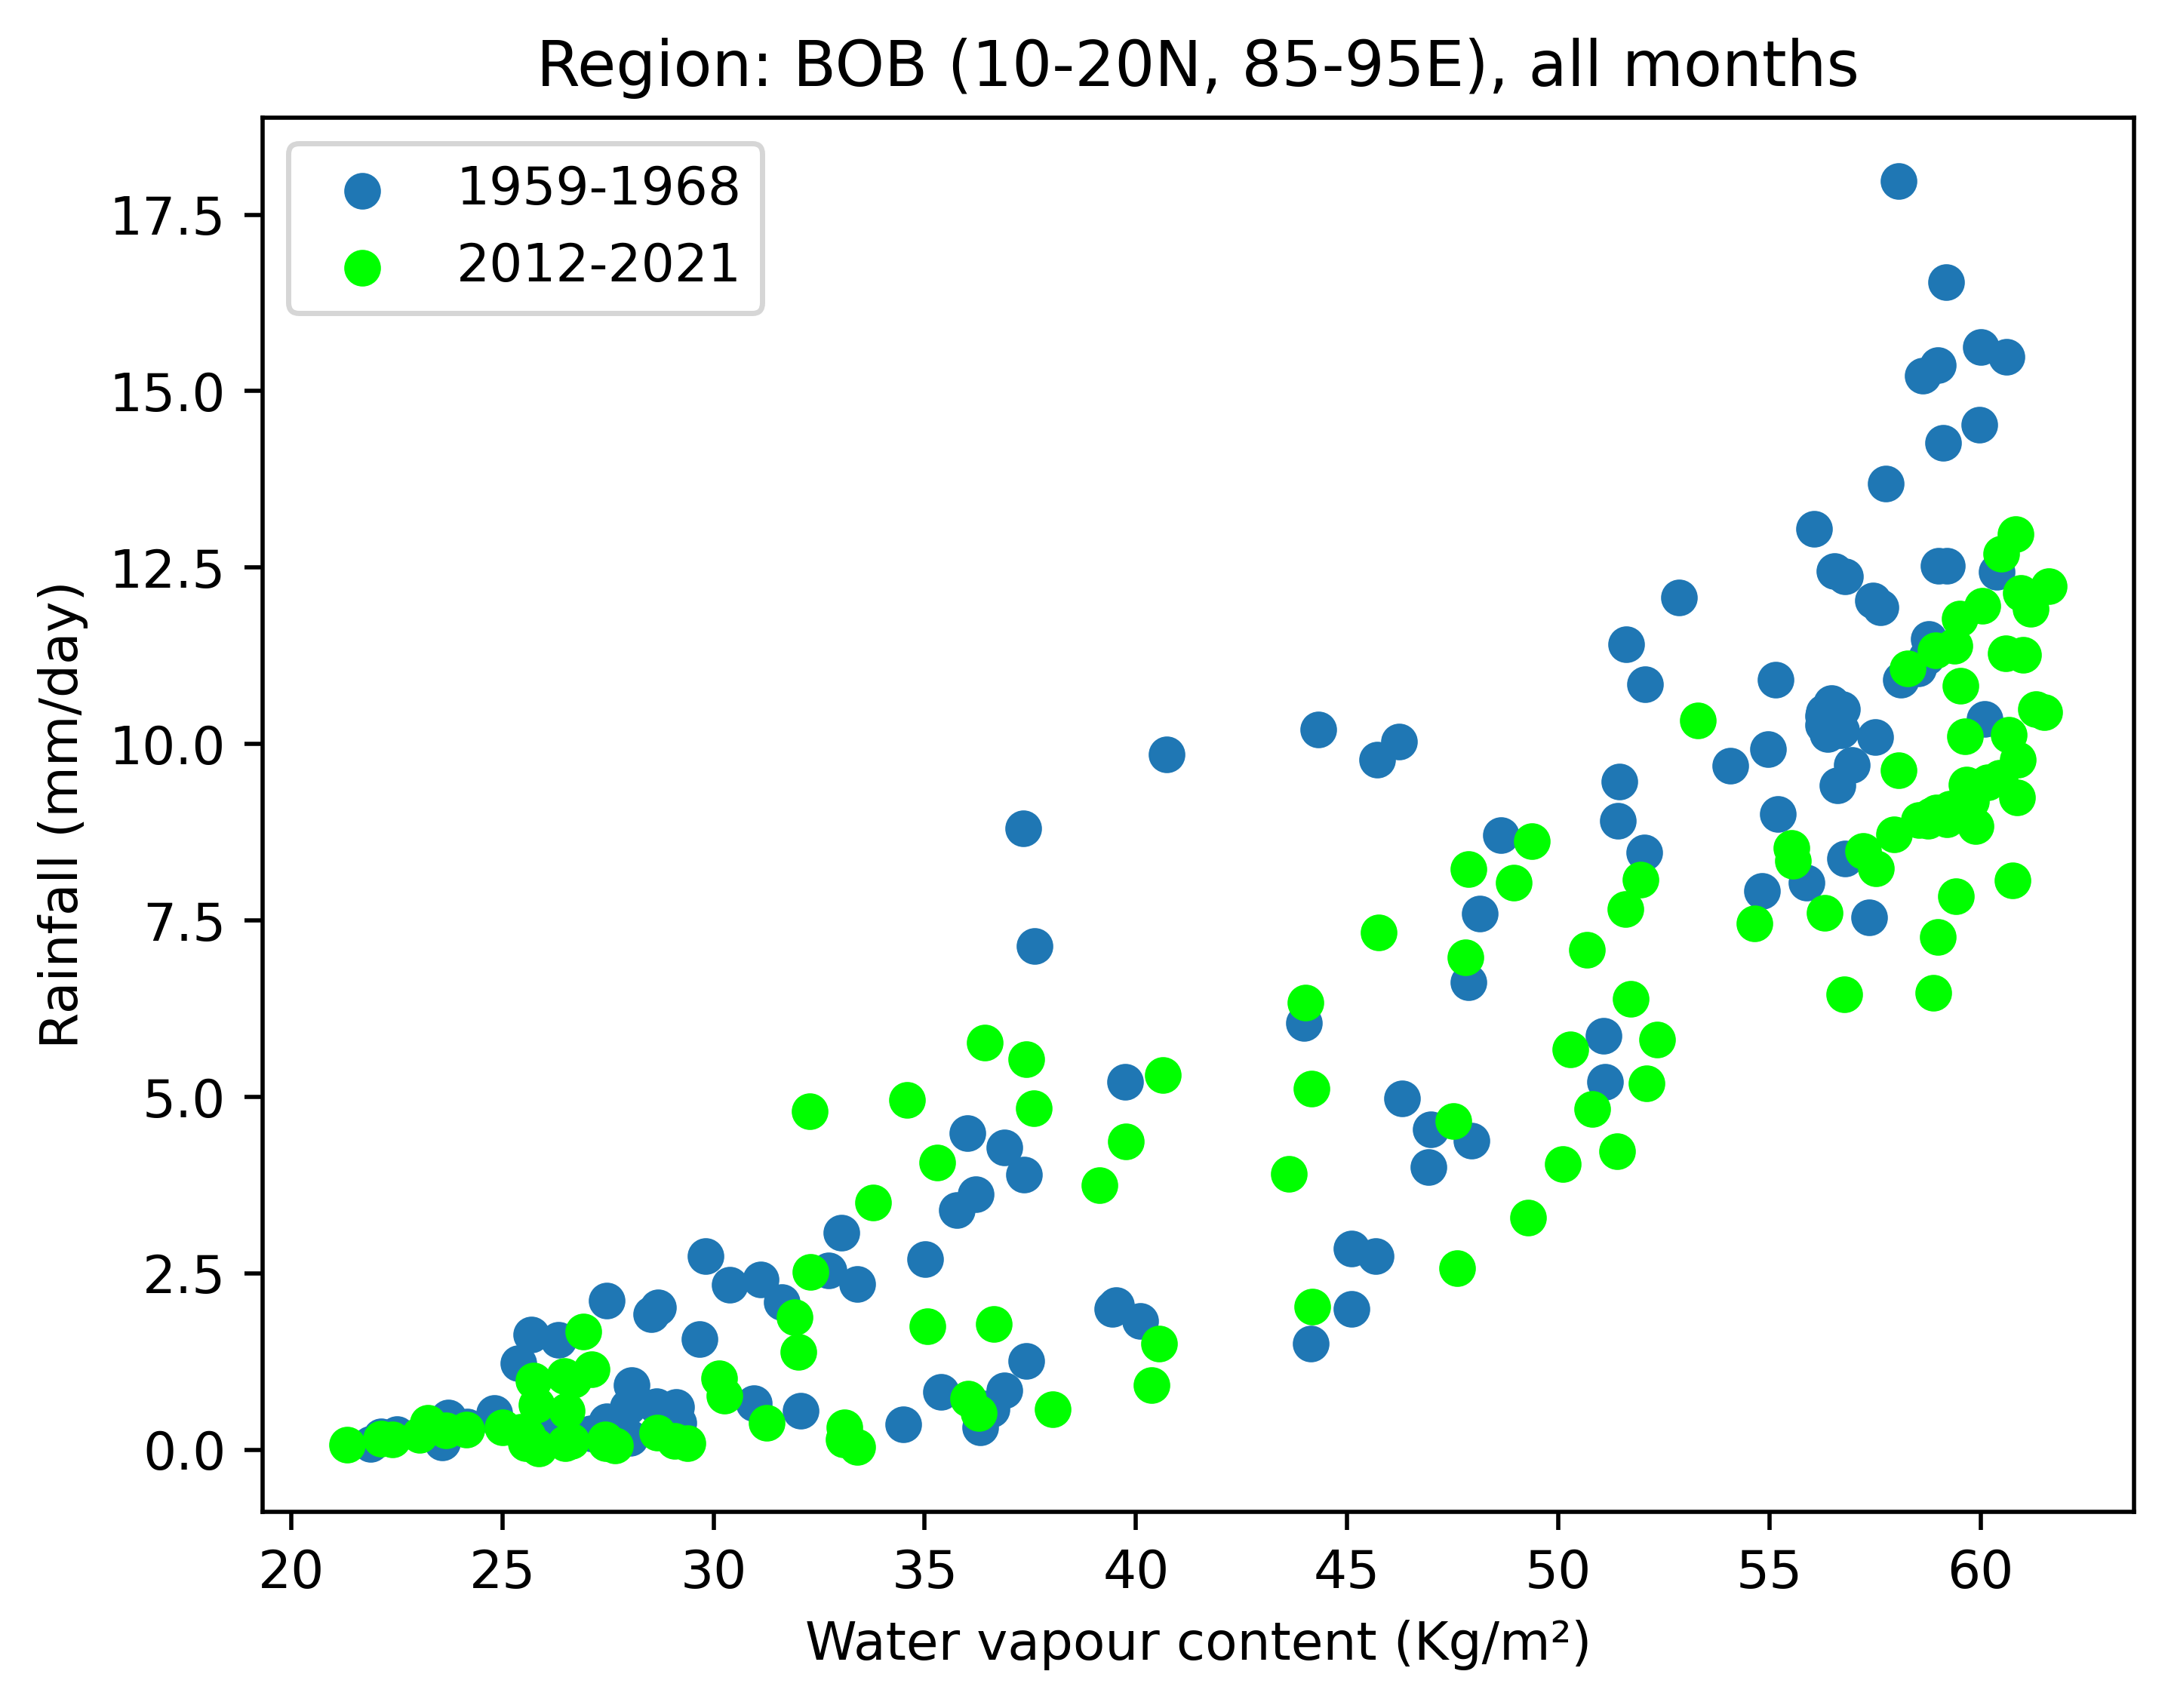

In [9]:
plt.scatter(x1, y1, label='1959-1968')
plt.scatter(x2, y2, c='lime', label='2012-2021')
plt.xlabel('Water vapour content (Kg/m\u00b2)')
plt.ylabel('Rainfall (mm/day)')
#plt.title('Region: BOB (10-20N, 85-95E), all months')
#plt.title('Only months June-September')
plt.legend()

# VMS 

In [6]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/MSE India.nc'
ds = xr.open_dataset(a)
f10 = netCDF4.Dataset(a)

g = 9.80616
Cp = 1004.64
Lv = 2.501e6

#Variable structure = [month, height, expver, lat, lon]
#month = 256 (JJAS of 1959-2022), height = 37
print(f10.variables.keys())
# m = Moist static energy (Cp.T + g.Z + Lv.q)
v1 = f7['lsm'][0, :, :]
VMS = []
for i in range(0,637,636):
    sum = 0
    for j in range(i, i+120):
        m1 = np.array(Cp*f10['t'][j,14,:,:] + f10['z'][j,14,:,:] + Lv*f10['q'][j,14,:,:]) #14 is 200mb
        m2 = np.array(Cp*f10['t'][j,30,:,:] + f10['z'][j,30,:,:] + Lv*f10['q'][j,30,:,:]) #30 is 850mb
        sum = np.multiply(v1, m1-m2)
        VMS.append(np.average(sum[np.nonzero(sum)]))

dict_keys(['longitude', 'latitude', 'level', 'time', 'z', 'q', 't'])


In [8]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81, level: 37, time: 756)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 89.5 89.75 90.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... 10.5 10.25 10.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-25 10:30:44 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [9]:
V1 = VMS[0:120]
V2 = VMS[120:]

In [12]:
DSE = []
for i in range(0,637,636):
    sum = 0
    for j in range(i, i+120):
        m1 = np.array(Cp*f10['t'][j,14,:,:] + f10['z'][j,14,:,:]) #14 is 200mb
        m2 = np.array(Cp*f10['t'][j,30,:,:] + f10['z'][j,30,:,:]) #30 is 850mb
        sum = np.multiply(v1, m1-m2)
        DSE.append(np.average(sum[np.nonzero(sum)]))

In [13]:
D1 = DSE[0:120]
D2 = DSE[120:]

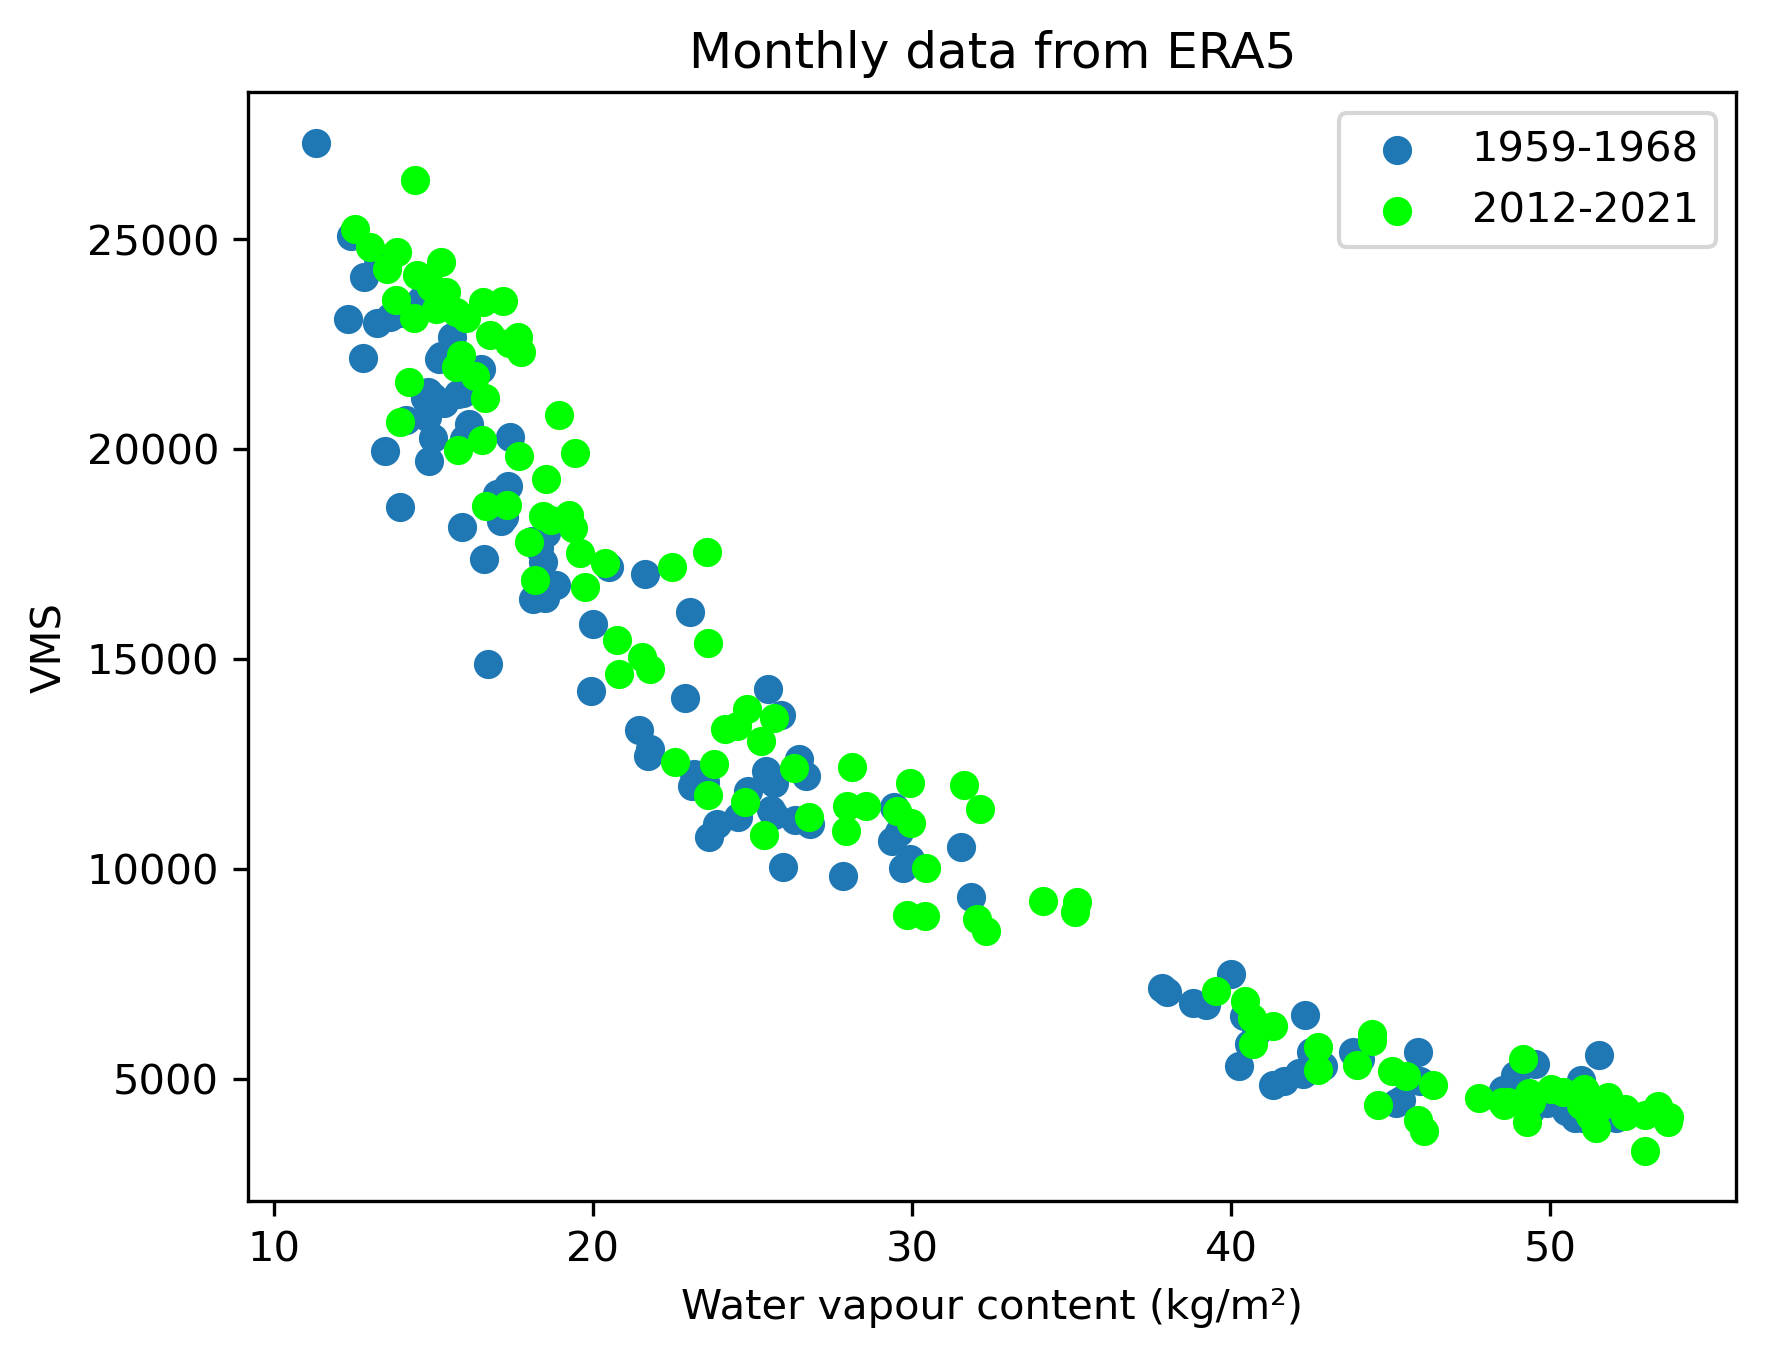

In [10]:
plt.scatter(x1, V1, label='1959-1968')
plt.scatter(x2, V2, c='lime', label='2012-2021')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('VMS')
plt.title('Monthly data from ERA5')
#plt.title('Only months June-September')
plt.legend()
plt.show()

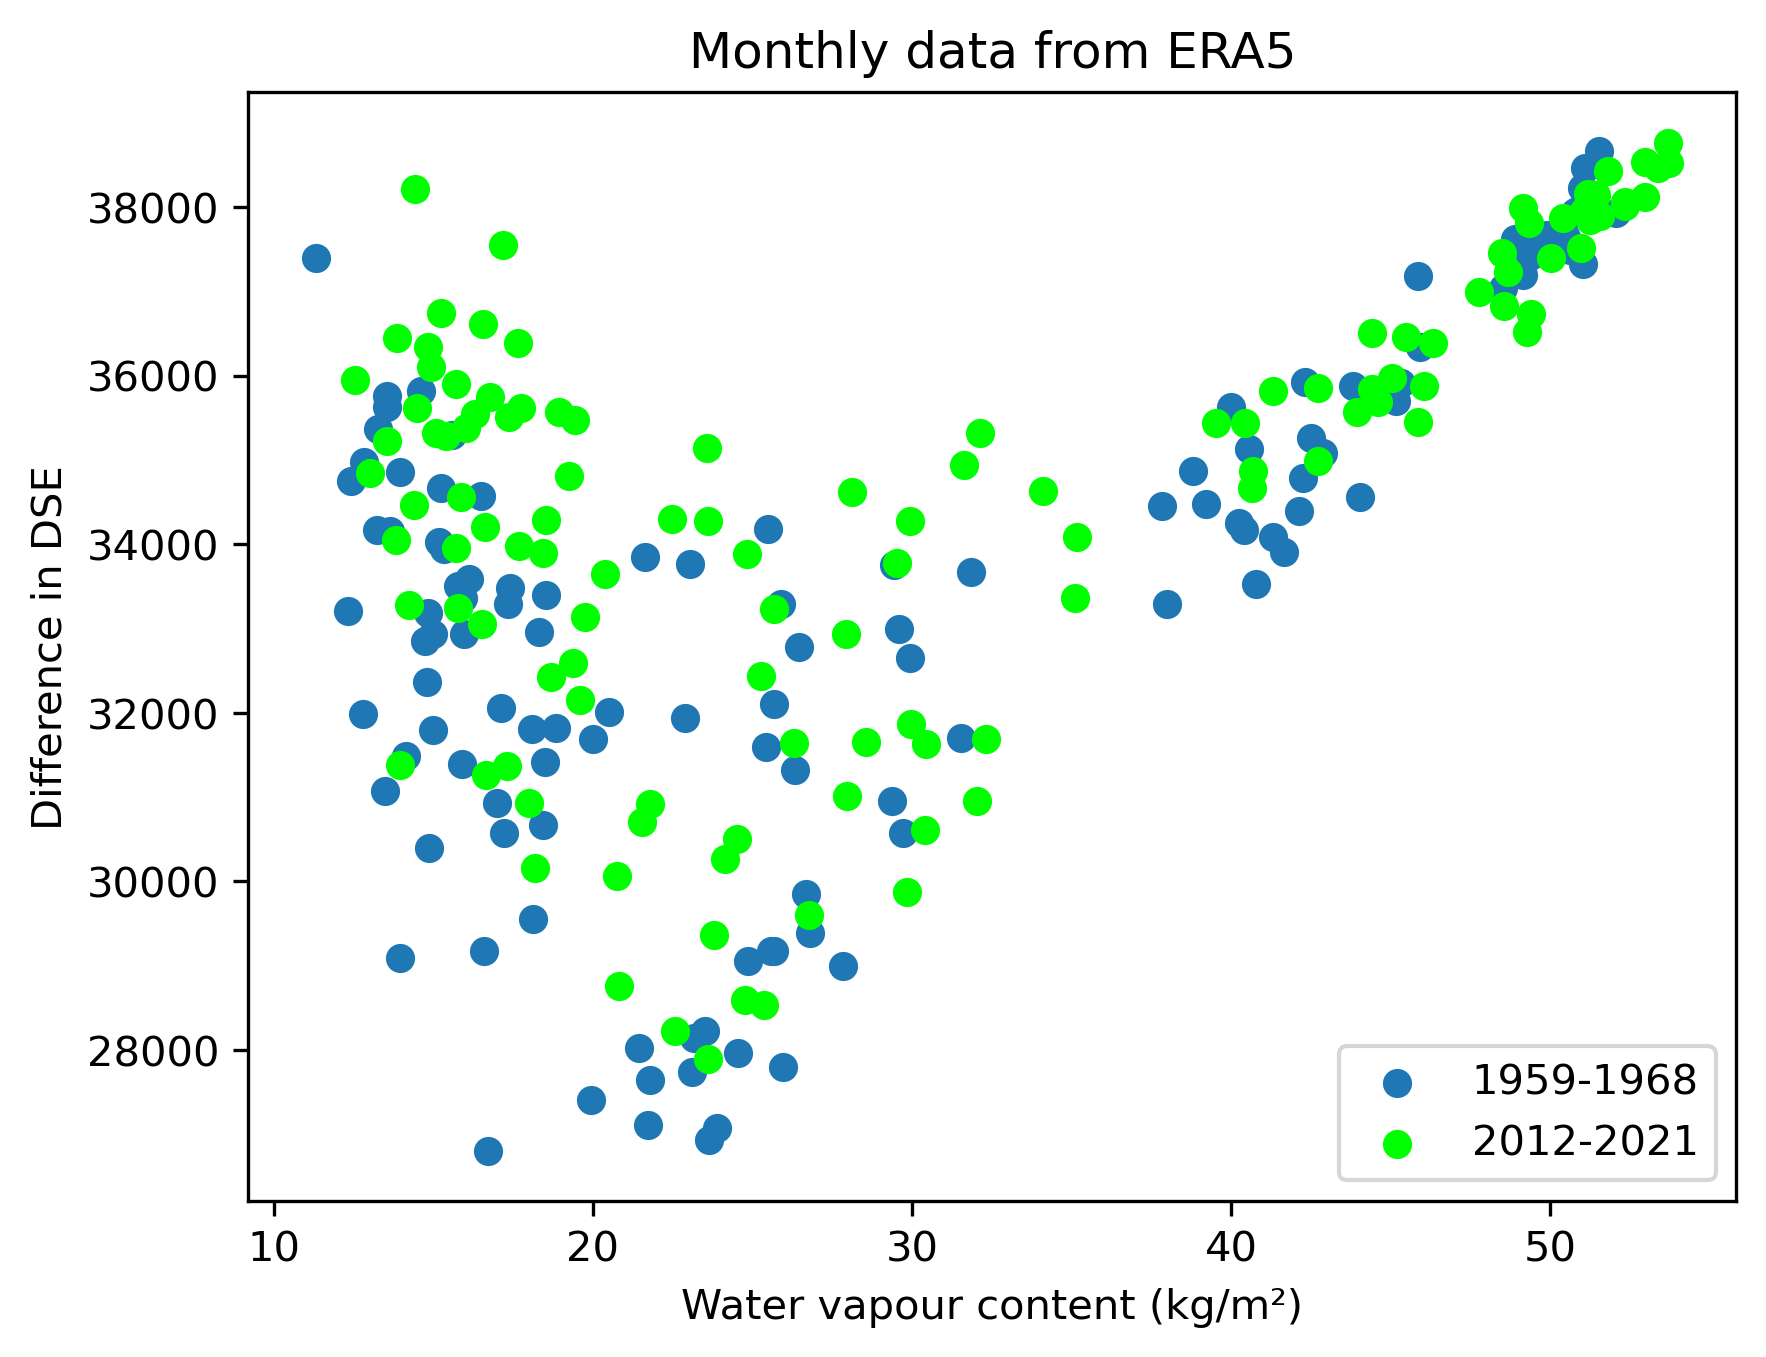

In [15]:
plt.scatter(x1, D1, label='1959-1968')
plt.scatter(x2, D2, c='lime', label='2012-2021')
plt.xlabel('Water vapour content (kg/m\u00b2)')
plt.ylabel('Difference in DSE (J/kg)')
plt.title('Monthly data from ERA5')
#plt.title('Only months June-September')
plt.legend()
plt.show()

In [9]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
ds = xr.open_dataset(h)

In [10]:
lon_grid, lat_grid = np.meshgrid(ds.longitude, ds.latitude)
mask = globe.is_land(lat_grid, lon_grid)

In [11]:
jjas = ds.time.dt.month.isin(range(6, 10)) #JJAS
clim = ds.sel(time=jjas)
clim = clim.groupby('time.year').mean('time')
clim3 = clim.where(mask>0).mean(dim=['latitude', 'longitude'])

In [12]:
Pwat = clim3.tcwv
P = 86400*28.96*(clim3.mtpr+clim3.mer)
Qdiv = clim3.mtnswrf + clim3.mtnlwrf + clim3.mslhf + clim3.msshf + clim3.msnswrf + clim3.msnlwrf
TGMS = np.divide(Qdiv, P)

In [13]:
Pwat1 = Pwat.sel(year=slice('1959', '1978'))
Pwat2 = Pwat.sel(year=slice('2002', '2021'))
TGMS1 = TGMS.sel(year=slice('1959', '1978'))
TGMS2 = TGMS.sel(year=slice('2002', '2021'))

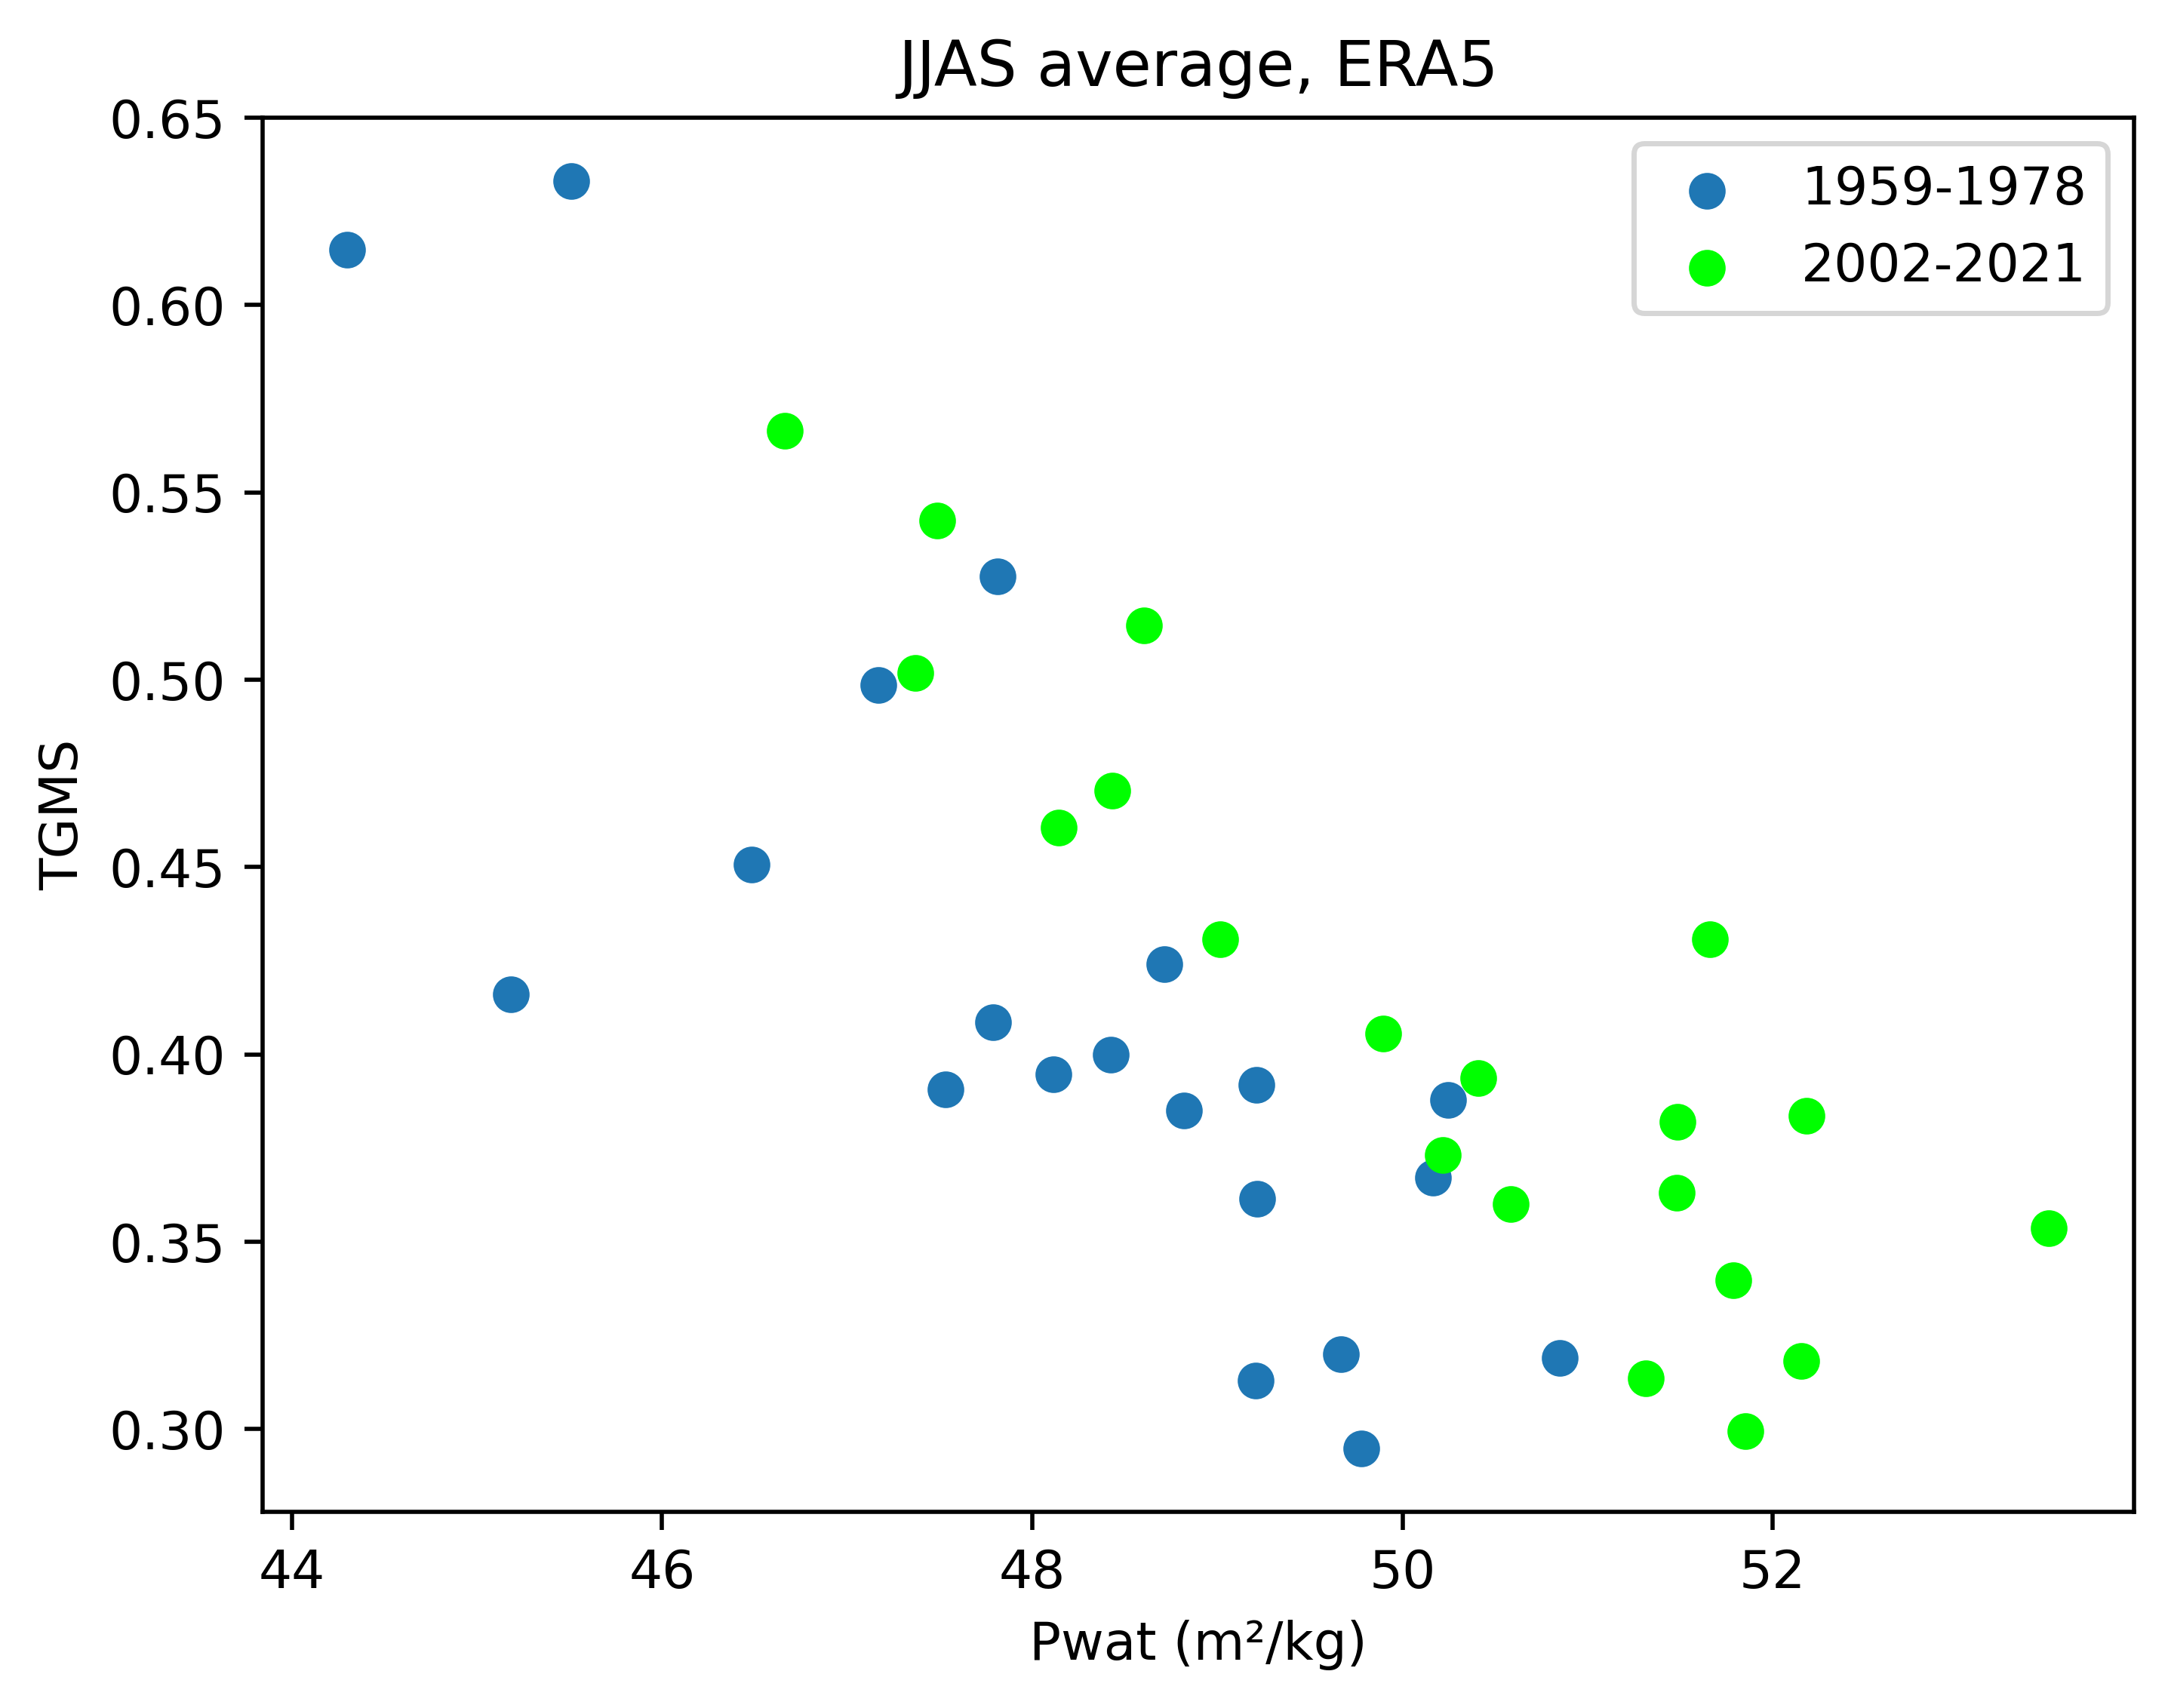

In [14]:
plt.scatter(Pwat1, TGMS1)
plt.scatter(Pwat2, TGMS2, c='lime')
plt.ylabel('TGMS')
plt.xlabel('Pwat (m\u00b2/kg)')
plt.title('JJAS average, ERA5')
plt.legend(['1959-1978', '2002-2021'])
plt.show()